# Data Preparation and Preprocessing

### Load the required libraries, dataset and carry out preprocessing tasks

In [1]:
# import the TensorFlow Library
import tensorflow as tf

# Load the MNIST Dataset
mnist = tf.keras.datasets.mnist

# Load the data into training and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalise the training and test sets
x_train = tf.keras.utils.normalize(x_train, axis=1)
x_test = tf.keras.utils.normalize(x_test, axis=1)

2022-02-14 11:38:10.158412: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/davianc/HADOOP/lib/native:
2022-02-14 11:38:10.158441: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


### Explore the dataset using visualisations

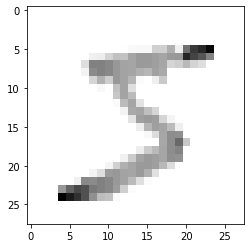

In [2]:
import matplotlib.pyplot as plt

# show an image from the dataset
plt.imshow(x_train[0], cmap=plt.cm.binary)

The first example in the training set is the image of a `5`. If we print this value, we see that the computational representation is a numpy `ndarray`.

In [3]:
# view the computational representation of the image.
print(x_train[0])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

### Create and train a sequential neural network model

In [4]:
# Create a sequential models
model = tf.keras.models.Sequential()

# Add hidden layers
model.add(tf.keras.layers.Flatten()) # flatten the first layer

# Create dense layers for the inner hidden layers with activation function
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))

# Create the final layer with probabilistic activation function
model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax))

# Compile the model with optimiser, loss function and metric
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model using the training data
model.fit(x_train, y_train, epochs=3)

2022-02-14 11:38:13.272326: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/davianc/HADOOP/lib/native:
2022-02-14 11:38:13.272354: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-02-14 11:38:13.272374: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (drc-02): /proc/driver/nvidia/version does not exist
2022-02-14 11:38:13.272648: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Epoch 1/3
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2597 - accuracy: 0.9233
Epoch 2/3
1875/1875 [==============================] - 3s 1ms/step - loss: 0.1071 - accuracy: 0.9672
Epoch 3/3
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0740 - accuracy: 0.9762


The training results show that the model is about 98% accurate with a loss of about 8%. 

### Evaluate the loss function and accuracy score of the model.

In [5]:
# test the model on the test data and extract the loss and accuracy values.
val_loss, val_acc = model.evaluate(x_test, y_test)
print(f"loss: {val_loss}, accuracy: {val_acc}")

313/313 [==============================] - 0s 1ms/step - loss: 0.0888 - accuracy: 0.9720
loss: 0.08884605765342712, accuracy: 0.972000002861023


On the test data, the model is about 97.0% accurate, experiencing a slight reduction in accuracy, and slight increase in loss (~9.0%).

### Save the model, reload it, and use it for prediction

In [6]:
# save the model
model.save('test_num_reader.model')

# reload the model into a new variable
new_model = tf.keras.models.load_model('test_num_reader.model')

2022-02-14 11:38:22.639366: W tensorflow/python/util/util.cc:368] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.


INFO:tensorflow:Assets written to: test_num_reader.model/assets


In [7]:
# use the reloaded model to make predictions
predictions = new_model.predict([x_test])
print(predictions)

[[3.5767284e-10 5.2902632e-08 1.9992540e-06 ... 9.9996138e-01
  1.6786579e-09 8.6941702e-07]
 [6.0253974e-08 1.0105975e-02 9.8980355e-01 ... 3.0248506e-09
  1.2814756e-07 2.0510825e-08]
 [2.8465442e-07 9.9941468e-01 4.4954704e-05 ... 3.0811716e-04
  1.2403079e-04 6.2811073e-06]
 ...
 [5.0820681e-08 2.2191699e-07 3.6665281e-08 ... 8.8562720e-06
  1.7803317e-06 1.2868393e-04]
 [9.1368844e-07 1.6723429e-06 7.4550499e-08 ... 7.5590870e-06
  1.7342929e-04 4.3273108e-08]
 [1.0176187e-06 2.0362148e-08 2.6419815e-07 ... 1.8142397e-10
  2.0049359e-07 9.7753077e-09]]


The `predictions` variable stores probability distribution values in a `ndarray` for the predicted outcomes and so it is not quite useful to us in this format. To overcome this problem, we can use `numpy`'s `argmax()` function as shown below:

In [8]:
# view the predicted value
import numpy as np
seventh_prediction = np.argmax(predictions[4])
print(seventh_prediction)

4


This tells us that the 3rd predicted value is a `4`. We can view the graphical representation to confirm this.

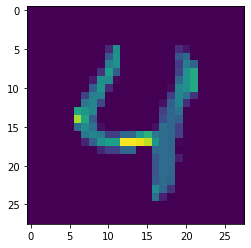

In [9]:
# view the graphical representation of the predicted value
plt.imshow(x_test[4])